### Step 1: Construct the assays & compounds table

#### 1.1 Construct the assays table,with fields as the following

CID VARCHAR(30) PRIMARY KEY,  
r_inhibition_at_20_uM DOUBLE,  
r_inhibition_at_50_uM DOUBLE,  
r_avg_IC50 DOUBLE,  
f_inhibition_at_20_uM DOUBLE,  
f_inhibition_at_50_uM DOUBLE,  
f_avg_IC50 DOUBLE,  
f_avg_pIC50 DOUBLE  


In [131]:
import sqlite3 as sql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from rdkit.ML.Cluster.Butina import ClusterData
import csv
from pathlib import Path

In [2]:
# Add file name here
data_file = Path('activity_data.csv')
db_file = Path('MPro_binding.db')

In [3]:
# 1: drop the database
for table_name in ('compounds','assays'):
    sql.connect(db_file).execute('DROP TABLE IF EXISTS ' + table_name)

In [4]:
# 2: create a new database
conn = sql.connect(db_file)
conn.execute('''
CREATE TABLE assays
(
    CID VARCHAR(20) PRIMARY KEY,
    r_inhibition_at_20_uM DECIMAL,
    r_inhibition_at_50_uM DECIMAL,
    r_avg_IC50 DECIMAL,
    f_inhibition_at_20_uM DECIMAL,
    f_inhibition_at_50_uM DECIMAL,
    f_avg_IC50 DECIMAL,
    f_avg_pIC50 DECIMAL
)

''')

conn.execute('''
CREATE TABLE compounds
(
    CID VARCHAR(20) PRIMARY KEY,
    SMILES VARCHAR(2000) NOT NULL,
    FOREIGN KEY(CID) REFERENCES assays(CID) 
)
''')


In [5]:
# 3: Add records to the table assays 
itemlist = []
with open(data_file,encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for row in reader:
        itemlist.append((row['CID'],row['r_inhibition_at_20_uM'],
                         row['r_inhibition_at_50_uM'],row['r_avg_IC50'],
                         row['f_inhibition_at_20_uM'],row['f_inhibition_at_50_uM'],
                         row['f_avg_IC50'],row['f_avg_pIC50']))
print(itemlist)
conn = self.get_conn()
conn.executemany('INSERT INTO <TABLE> (Col1, Col2) VALUES(?,?)', ((1,2), (2,3)))
print('###############################')
        
# 4: Add records to the table compounds
itemlist = []
with open(data_file, newline='',encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(type(row['CID']))
        print(type(row['SMILES']))
        itemlist.append((row['CID'],row['SMILES']))

#print(itemlist)
conn = sql.connect(db_file)
conn.executemany("INSERT INTO compounds (CID,SMILES) VALUES(?,?)",itemlist)
                
                

[('LUO-POS-e1dab717-11', '', '', '', '', '', '0.275118241099123', ''), ('LUO-POS-e1dab717-12', '', '', '', '', '', '0.202766791018038', ''), ('MAT-POS-e48723dc-1', '', '', '', '', '', '55.4539472183434', ''), ('MAT-POS-e48723dc-2', '', '', '', '', '', '0.0500000007450581', ''), ('LUO-POS-9931618f-2', '', '', '', '', '', '0.0527566448489595', ''), ('EDJ-MED-b6c6ee2b-2', '', '', '', '', '', '0.153279934357818', ''), ('EDJ-MED-b6c6ee2b-3', '', '', '', '', '', '0.214885085602627', ''), ('EDJ-MED-5cd3920d-5', '', '', '', '', '', '0.15535120394062', ''), ('EDJ-MED-5cd3920d-6', '', '', '', '', '', '0.15665931676081', ''), ('MAT-POS-50a80394-1', '', '', '', '', '', '0.106542506041203', ''), ('MAT-POS-50a80394-2', '', '', '', '', '', '0.0744085085108016', ''), ('MAT-POS-be048f2c-5', '', '', '', '', '', '0.297012069374338', ''), ('MAT-POS-be048f2c-6', '', '', '', '', '', '0.267639768802499', ''), ('MAT-POS-be048f2c-7', '', '', '', '', '', '0.162875697461307', ''), ('EDJ-MED-cc48ee33-4', '', '', 

OperationalError: no such table: nonsense

In [10]:
# 5. check whether records have been inserted successfully (show the table)
'''
for table in ('assays','compounds'):
    cur = sql.connect(db_file).execute('SELECT sql FROM sqlite_master WHERE name=\'' + table + '\'')
    row = cur.fetchall()
    if row is not None:
        print(table+'\n')
        print(row[0:5])
    else:
        print('Table ' + table + ' not found')
'''
conn = sql.connect(db_file)
result = conn.execute('''
    SELECT
        SMILES
    FROM 
        compounds''')
print(result)
for row in result:
    print(row)


### We give up sql, and we used pandas instead

In [7]:
df_temp = pd.read_csv(data_file)
assays = df_temp[['CID','r_inhibition_at_20_uM','r_inhibition_at_50_uM','r_avg_IC50','f_inhibition_at_20_uM','f_inhibition_at_50_uM','f_avg_IC50','f_avg_pIC50']]
compounds = df_temp[['CID','SMILES']]

In [9]:
assays.head()

,CID,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50
0,LUO-POS-e1dab717-11,NaN,NaN,NaN,NaN,NaN,0.275118,NaN
1,LUO-POS-e1dab717-12,NaN,NaN,NaN,NaN,NaN,0.202767,NaN
2,MAT-POS-e48723dc-1,NaN,NaN,NaN,NaN,NaN,55.453947,NaN
3,MAT-POS-e48723dc-2,NaN,NaN,NaN,NaN,NaN,0.050000,NaN
4,LUO-POS-9931618f-2,NaN,NaN,NaN,NaN,NaN,0.052757,NaN


In [10]:

compounds.head()

,CID,SMILES
0,LUO-POS-e1dab717-11,CCNC(=O)CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl...
1,LUO-POS-e1dab717-12,O=C(CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl)ccc...
2,MAT-POS-e48723dc-1,CNC(=O)C1(N2C[C@]3(CCN(c4cncc5ccccc45)C3=O)c3c...
3,MAT-POS-e48723dc-2,CNC(=O)C1(N2C[C@@]3(CCN(c4cncc5ccccc45)C3=O)c3...
4,LUO-POS-9931618f-2,CNC(=O)CN1C[C@@]2(CCN(c3cncc4ccccc34)C2=O)c2cc...


### Step 2: data exploration 

#### 2.1: Molecular descriptors

In [12]:
#%pip install rdkit

Note: you may need to restart the kernel to use updated packages.


In [21]:
import rdkit.Chem as Chem
from rdkit.Chem.Descriptors import MolWt, MolLogP, NumHDonors, NumHAcceptors

In [22]:
def calculate_descriptors(smile):
    molecule = Chem.MolFromSmiles(smile)
    if molecule:
        hbd, hba, mw, pow = [x(molecule) for x in [NumHDonors, NumHAcceptors, MolWt, MolLogP]]
        res = [hbd, hba, mw, pow]
    else:
        res = [None] * 4
    return res

In [28]:
print(compounds['SMILES'][4])
print(calculate_descriptors(compounds['SMILES'][4]))

CNC(=O)CN1C[C@@]2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl)ccc2C1=O
[1, 4, 448.9100000000002, 2.7647000000000013]


In [25]:
hbd, hba, mw, pow =[],[],[],[]
for i in range(len(compounds)):
    hbd_temp, hba_temp, mw_temp, pow_temp = calculate_descriptors(compounds['SMILES'][i])
    hbd.append(hbd_temp)
    hba.append(hba_temp)
    mw.append(mw_temp)
    pow.append(pow_temp)
compounds['hbd'] = hbd
compounds['hba'] = hba
compounds['mw'] = mw
compounds['pow'] = pow

C:\Users\Swimming\AppData\Local\Temp\ipykernel_43692\2427077118.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compounds['hbd'] = hbd
C:\Users\Swimming\AppData\Local\Temp\ipykernel_43692\2427077118.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compounds['hba'] = hba
C:\Users\Swimming\AppData\Local\Temp\ipykernel_43692\2427077118.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [26]:
compounds.head()

,CID,SMILES,hbd,hba,mw,pow
0,LUO-POS-e1dab717-11,CCNC(=O)CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl...,1,5,498.992,2.7033
1,LUO-POS-e1dab717-12,O=C(CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl)ccc...,1,5,525.030,3.0934
2,MAT-POS-e48723dc-1,CNC(=O)C1(N2C[C@]3(CCN(c4cncc5ccccc45)C3=O)c3c...,1,4,474.948,3.2973
3,MAT-POS-e48723dc-2,CNC(=O)C1(N2C[C@@]3(CCN(c4cncc5ccccc45)C3=O)c3...,1,4,474.948,3.2973
4,LUO-POS-9931618f-2,CNC(=O)CN1C[C@@]2(CCN(c3cncc4ccccc34)C2=O)c2cc...,1,4,448.910,2.7647


* 5 or fewer hydrogen bond donors;
* 10 or fewer hydrogen bond acceptors;
* A molecular weight (MW) of less than 500 Daltons;
* An octanol-water partition coefficient (log Po/w) of less than 5. Larger log Po/w means more lipophilic (i.e., less water soluble).

In [32]:
# Select compounds based on Lipinski's rule of five
print('Total number of compounds: ',len(compounds))
compounds_lip_strict = compounds.loc[(compounds['hbd']<=5) & (compounds['hba']<=10) & (compounds['mw']<500) & (compounds['pow']<5)]
print('Number of compounds after selected by Lipinski rule: ',len(compounds_lip_strict))

Total number of compounds:  2062
Number of compounds after selected by Lipinski rule:  1539


In [33]:
assays_lip_strict = assays.loc[(compounds['hbd']<=5) & (compounds['hba']<=10) & (compounds['mw']<500) & (compounds['pow']<5)]

In [36]:
print('Number of assays after Lipinski rule: ',len(assays_lip_strict))

Number of assays after Lipinski rule:  1539


In [48]:
%matplotlib inline
def plot_hist(data_1,data_2,nbins=100):
    data_1 = data_1.to_numpy()
    data_2 = data_2.to_numpy()
    plt.hist(data_1[~np.isnan(data_1)],bins=nbins,alpha=0.3,density=True)
    plt.hist(data_2[~np.isnan(data_2)],bins=nbins,alpha=0.3,density=True)

198.0


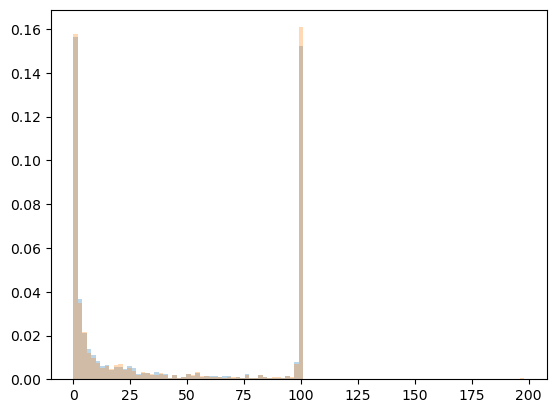

In [49]:
print(max(assays['f_avg_IC50']))
plot_hist(assays['f_avg_IC50'],assays_lip_strict['f_avg_IC50'])

In [61]:
(compounds['hbd']<=5).astype(int) + (compounds['hba']<=10).astype(int) + (compounds['mw']<500).astype(int) + (compounds['pow']<5).astype(int)>=3

0       4
1       3
2       4
3       4
4       4
       ..
2057    4
2058    4
2059    4
2060    4
2061    4
Length: 2062, dtype: int32

In [62]:
compounds_lip = compounds[(compounds['hbd']<=5).astype(int) + (compounds['hba']<=10).astype(int) + (compounds['mw']<500).astype(int) + (compounds['pow']<5).astype(int)>=3]
assays_lip = assays[(compounds['hbd']<=5).astype(int) + (compounds['hba']<=10).astype(int) + (compounds['mw']<500).astype(int) + (compounds['pow']<5).astype(int)>=3]

In [63]:
print('Number of compounds after less strict lipinski rule: ',len(compounds_lip))

Number of compounds after less strict lipinski rule:  1974


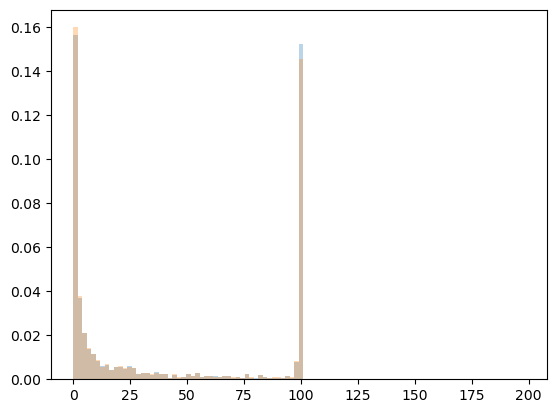

In [65]:
plot_hist(assays['f_avg_IC50'],assays_lip['f_avg_IC50'])

By filtering the compounds in a less strict way, we definitely obtained more compounds!


#### 2.2 ECFP fingerprints

In [66]:
# Check whether we have revised the compounds
len(compounds)

2062

In [79]:
from rdkit.Chem import AllChem
def ECFP(smile,radius=2,nBits=2048):
    molecule = Chem.MolFromSmiles(smile)
    return AllChem.GetMorganFingerprintAsBitVect(molecule,radius,nBits=nBits)

from rdkit.DataStructs import FingerprintSimilarity,DiceSimilarity


In [97]:
ECFP_temp = []
for i in range(len(compounds)):
    ECFP_temp.append(ECFP(compounds['SMILES'][i]))
compounds['ECFP'] = ECFP_temp

C:\Users\Swimming\AppData\Local\Temp\ipykernel_43692\313926559.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compounds['ECFP'] = ECFP_temp


In [102]:
compounds.head()

,CID,SMILES,hbd,hba,mw,pow,ECFP
0,LUO-POS-e1dab717-11,CCNC(=O)CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl...,1,5,498.992,2.7033,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,LUO-POS-e1dab717-12,O=C(CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl)ccc...,1,5,525.030,3.0934,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,MAT-POS-e48723dc-1,CNC(=O)C1(N2C[C@]3(CCN(c4cncc5ccccc45)C3=O)c3c...,1,4,474.948,3.2973,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,MAT-POS-e48723dc-2,CNC(=O)C1(N2C[C@@]3(CCN(c4cncc5ccccc45)C3=O)c3...,1,4,474.948,3.2973,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,LUO-POS-9931618f-2,CNC(=O)CN1C[C@@]2(CCN(c3cncc4ccccc34)C2=O)c2cc...,1,4,448.910,2.7647,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [105]:
def compute_similarity(fingerprint_1,fingerprint_2):
    return FingerprintSimilarity(fingerprint_1,fingerprint_2, metric=DiceSimilarity)


In [117]:
similarity_matrix = np.zeros((len(compounds),len(compounds)))
for i in range(len(compounds)):
    for j in range(len(compounds)):
        similarity_matrix[i,j] = compute_similarity(compounds['ECFP'][i],compounds['ECFP'][j])

In [115]:
print(similarity_matrix)

[[1.         0.91176471 0.73846154 ... 0.         0.         0.        ]
 [0.91176471 1.         0.70149254 ... 0.         0.         0.        ]
 [0.73846154 0.70149254 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<AxesSubplot:>

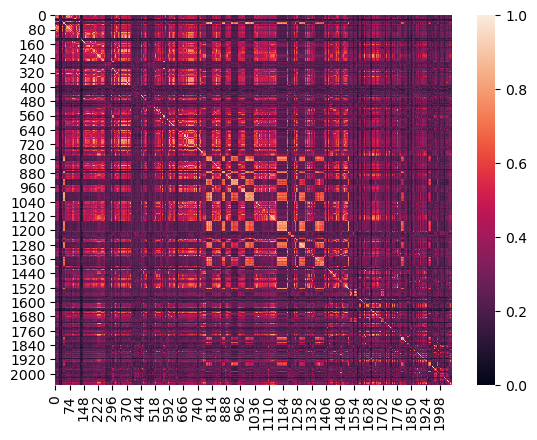

In [118]:
seaborn.heatmap(similarity_matrix)

(array([  32158.,  695284., 1905256.,  692900.,  397898.,  293802.,
         140340.,   66962.,   23230.,    4014.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

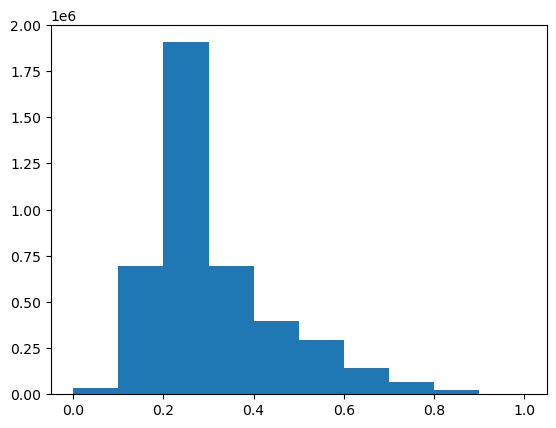

In [152]:
plt.hist(similarity_matrix.flatten())

In [185]:
cluster_result = DBSCAN(eps=0.2,min_samples=30,metric='precomputed').fit(1 - similarity_matrix)

(array([1279.,  284.,   34.,  219.,  193.]),
 array([-1,  0,  1,  2,  3,  4], dtype=int64),
 <BarContainer object of 5 artists>)

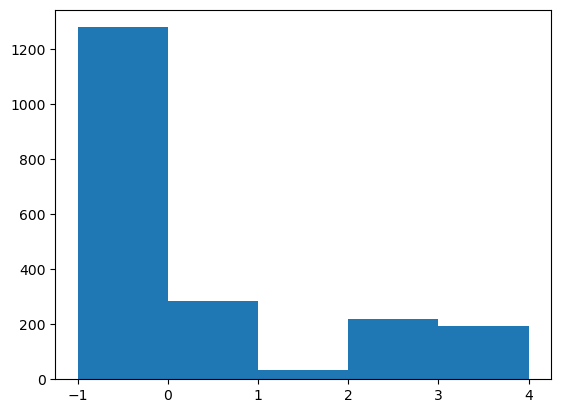

In [186]:
plt.hist(cluster_result.labels_,np.arange(np.min(cluster_result.labels_),np.max(cluster_result.labels_)),histtype='bar')

In [142]:
# We now leave the clustering
result = ClusterData(1 - similarity_matrix.flatten(),nPts=3,distThresh=0.5, isDistData=True) 

[16:05:33] WARNING: Distance matrix is too long



In [143]:
# Compute pIC50:
assays['r_avg_pIC50'] = - np.log10(assays['r_avg_IC50'])
assays['f_avg_pIC50'] = - np.log10(assays['f_avg_IC50'])

C:\Users\Swimming\AppData\Local\Temp\ipykernel_43692\67474813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assays['r_avg_pIC50'] = - np.log10(assays['r_avg_IC50'])
C:\Users\Swimming\AppData\Local\Temp\ipykernel_43692\67474813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assays['f_avg_pIC50'] = - np.log10(assays['f_avg_IC50'])


(array([  1.,   0.,   0.,   0.,   0.,   0., 623.,  18.,  17.,  18.,  16.,
         22.,  16.,  13.,  21.,  22.,  18.,  19.,  35.,  22.,  29.,  13.,
         19.,  19.,  19.,  23.,  11.,  23.,  24.,  19.,  23.,  18.,  27.,
         20.,  22.,  25.,  23.,  23.,  22.,  20.,  22.,  28.,  22.,  21.,
         16.,  20.,  24.,  19.,  22.,  24.,  20.,  19.,  23.,  13.,  21.,
         19.,  17.,  17.,  27.,  25.,  27.,  17.,  12.,  24.,  14.,  12.,
         22.,  16.,  10.,   8.,   9.,   7.,   4.,  12.,   2.,   3.,   1.,
          0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-2.29666519, -2.24796034, -2.19925549, -2.15055065, -2.1018458 ,
        -2.05314095, -2.0044361 , -1.95573125, -1.9070264 , -1.85832155,
        -1.80961671, -1.76091186, -1.71220701, -1.66350216, -1.61479731,
        -1.56609246, -1.51738762, -1.46868277, -1.41997792, -1.37127307,
        -1.32256822, -1.27

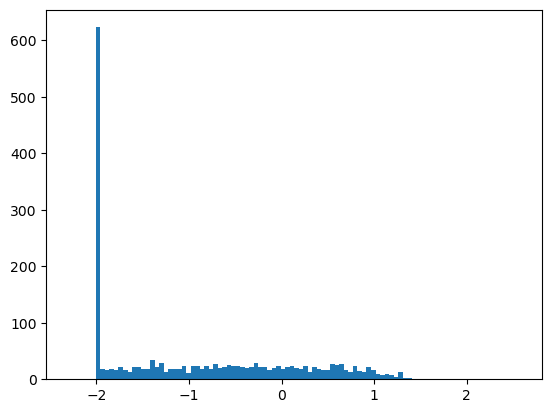

In [144]:
plt.hist(assays['f_avg_pIC50'],bins=100)


(array([255.,   5.,  13.,   3.,   8.,   4.,  12.,   7.,   6.,  14.,   3.,
          2.,   4.,  10.,   4.,   9.,   7.,   3.,  11.,   7.,   9.,  12.,
         11.,   5.,   5.,   5.,   4.,   3.,   4.,   4.,   3.,   3.,   4.,
          7.,   3.,   4.,   3.,   5.,   3.,   5.,   5.,   6.,   3.,   0.,
          7.,   3.,   4.,   9.,   8.,   5.,   5.,   7.,   4.,   9.,   4.,
          6.,   8.,   7.,   4.,   3.,  11.,   8.,   4.,   5.,   6.,   2.,
          3.,   2.,   3.,   4.,   1.,   1.,   2.,   4.,   2.,   1.,   1.,
          1.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-1.99913781e+00, -1.96145427e+00, -1.92377073e+00, -1.88608719e+00,
        -1.84840365e+00, -1.81072012e+00, -1.77303658e+00, -1.73535304e+00,
        -1.69766950e+00, -1.65998596e+00, -1.62230242e+00, -1.58461888e+00,
        -1.54693534e+00, -1.50925181e+00, -1.47156827e+00, -1.43388473e+00,
        -1.396

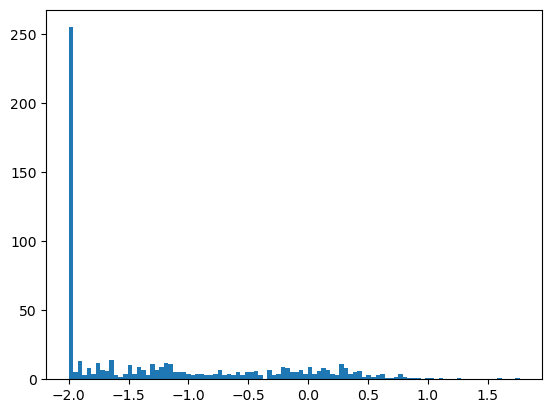

In [145]:
plt.hist(assays['r_avg_pIC50'],bins=100)

663


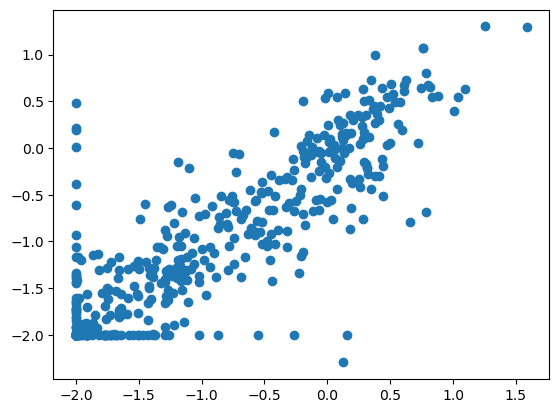

In [151]:
print(np.sum(~np.isnan(assays['r_avg_pIC50'])))
plt.scatter(assays['r_avg_pIC50'],assays['f_avg_pIC50'])

#### For the rest of the day
* plot distribution of pIC50(f&r), plot their correlations.(finished）
* Can we expand the dataset with chembl data?
* explore how to do the clustering based on similarity score (we used DBSCAN, and got 4 clusters). But the real challenge is how we interpretate the results(whether some scaffolds are overrepresented) 
* ML issues: training data, validation set, and test data.